## RNN Example for Time Series Data

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

#### Data
Release: Advance Monthly Sales for Retail and Food Services
Units: Millions of Dollars, Not Seasonally Adjusted

Frequency: Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation: U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN



In [3]:
data = pd.read_csv('RSCCASN.csv', index_col='DATE', parse_dates=True)

In [4]:
data.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [5]:
data.columns

Index(['RSCCASN'], dtype='object')

In [6]:
data.columns=['Sales']

In [7]:
data.columns

Index(['Sales'], dtype='object')

In [8]:
data.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


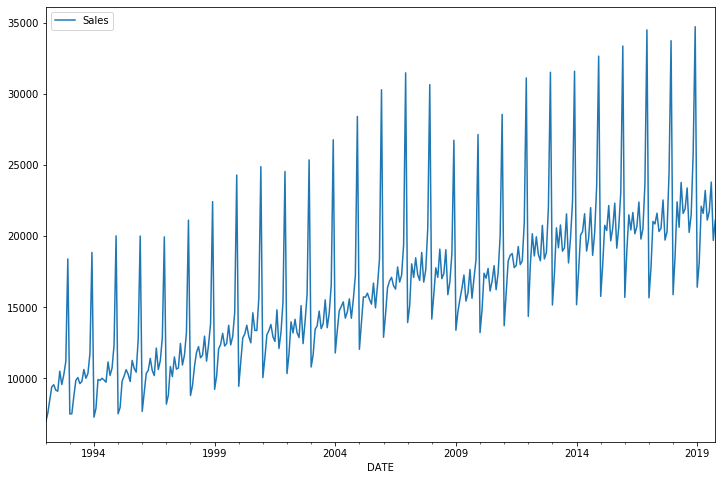

In [9]:
data.plot(figsize=(12,8))

### Train Test Split

In [10]:
len(data)

334

In [11]:
test_size = 18
train_ind = len(data) - test_size
print(test_size)
print(train_ind)

18
316


In [16]:
train = data.iloc[:train_ind]
test = data.iloc[train_ind:]

In [15]:
len(train)

316

In [17]:
len(test)

18

In [18]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [19]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


### Scale Data

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [23]:
len(scaled_train)

316

In [24]:
len(scaled_test)

18

### Time Series Generator

#### This class takes in a sequence of data-points gathered at equal intervals, along with time series parameters such as stride, length of history, etc., to produce batches for training/validation.

#### Arguments
##### data: Indexable generator (such as list or Numpy array)
    containing consecutive data points (timesteps).
    The data should be at 2D, and axis 0 is expected
    to be the time dimension.
##### targets: Targets corresponding to timesteps in `data`.
    It should have same length as `data`.
##### length: Length of the output sequences (in number of timesteps).
##### sampling_rate: Period between successive individual timesteps
    within sequences. For rate `r`, timesteps
    `data[i]`, `data[i-r]`, ... `data[i - length]`
    are used for create a sample sequence.
##### stride: Period between successive output sequences.
    For stride `s`, consecutive output samples would
    be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
##### start_index: Data points earlier than `start_index` will not be used
    in the output sequences. This is useful to reserve part of the
    data for test or validation.
##### end_index: Data points later than `end_index` will not be used
    in the output sequences. This is useful to reserve part of the
    data for test or validation.
##### shuffle: Whether to shuffle output samples,
    or instead draw them in chronological order.
##### reverse: Boolean: if `true`, timesteps in each output sample will be
    in reverse chronological order.
##### batch_size: Number of timeseries samples in each batch
    (except maybe the last one).

In [25]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [26]:
# Let's redefine to get 12 months back and then predict the next month out
length=12

generator = TimeseriesGenerator(
                                scaled_train,
                                scaled_train,
                                length=length,
                                batch_size=1
                               )



In [30]:
# What does the first batch look like?
X, y = generator[0]

In [31]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [32]:
y

array([[0.02047633]])

In [36]:
print(f'Given the Array: \n{X.flatten()}')

print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266]
Predict this y: 
 [[0.02047633]]


In [39]:
### Create the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [40]:
# We're only using one feature in our time series
n_features = 1

In [43]:
# # define model
model = Sequential()

model.add(LSTM(units=100, activation='relu', input_shape=(length, n_features)))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


### EarlyStopping and creating a Validation Generator

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
                           monitor='val_loss',
                           patience=2
                          )

In [47]:
validation_generator = TimeseriesGenerator(
                                           scaled_test,
                                           scaled_test,
                                           length=length,
                                           batch_size=1
                                          )

In [48]:
model.fit_generator(
                    generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop]
                   )

Epoch 1/20
304/304 [==============================] - 143s 469ms/step - loss: 0.0256 - val_loss: 0.0025
Epoch 2/20
304/304 [==============================] - 178s 585ms/step - loss: 0.0175 - val_loss: 0.0051
Epoch 3/20
304/304 [==============================] - 160s 527ms/step - loss: 0.0111 - val_loss: 0.0129


In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [50]:
losses = pd.DataFrame(model.history.history)

In [51]:
losses.head()

,loss,val_loss
0,0.025568,0.002537
1,0.017548,0.005065
2,0.011084,0.012933


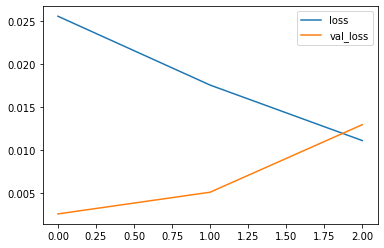

In [52]:
losses.plot()

### Evaluate on Test Data

In [53]:
first_eval_batch = scaled_train[-length:]

In [56]:
first_eval_batch = first_eval_batch.reshape((1, 12, n_features))

In [57]:
model.predict(first_eval_batch)

array([[0.60205436]], dtype=float32)

In [58]:
scaled_test[0]

array([0.61087714])

Now let's put this logic in a for loop to predict into the future for the entire test range.

NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUT AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!

In [59]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

### Inverse Transformations and Compare

In [61]:
true_predictions = scaler.inverse_transform(test_predictions)

# IGNORE WARNINGS
test['Predictions'] = true_predictions

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [62]:
test.head()

,Sales,Predictions
DATE,,
2018-05-01,23764,23520.985224
2018-06-01,21589,23035.833224
2018-07-01,21919,23428.498860
2018-08-01,23381,24812.647076
2018-09-01,20260,23432.706666


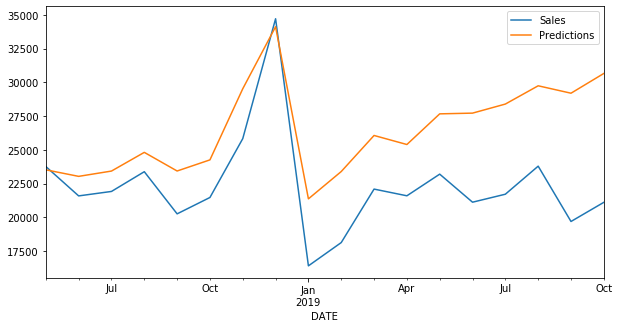

In [67]:
test.plot(figsize=(10,5))

### Retrain and Forecasting

In [70]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(data)

length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)


model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit_generator(generator,epochs=8)

Epoch 1/8
322/322 [==============================] - 171s 531ms/step - loss: 0.0220
Epoch 2/8
322/322 [==============================] - 216s 672ms/step - loss: 0.0161
Epoch 3/8
322/322 [==============================] - 275s 854ms/step - loss: 0.0078
Epoch 4/8
322/322 [==============================] - 205s 636ms/step - loss: 0.0037
Epoch 5/8
322/322 [==============================] - 239s 742ms/step - loss: 0.0025
Epoch 6/8
322/322 [==============================] - 216s 670ms/step - loss: 0.0020
Epoch 7/8
322/322 [==============================] - 186s 579ms/step - loss: 0.0017
Epoch 8/8
322/322 [==============================] - 215s 669ms/step - loss: 0.0011


In [71]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [72]:
forecast = scaler.inverse_transform(forecast)

### Creating new timestamp index with pandas.

In [73]:
data

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [74]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [75]:
forecast_df = pd.DataFrame(data=forecast,
                           index=forecast_index,
                           columns=['Forecast'])

In [76]:
forecast_df

,Forecast
2019-11-01,25219.050879
2019-12-01,35276.791039
2020-01-01,16128.533976
2020-02-01,17929.302607
2020-03-01,21389.554941
2020-04-01,20982.418917
2020-05-01,22434.622609
2020-06-01,20570.757408
2020-07-01,21171.975410
2020-08-01,23063.178217


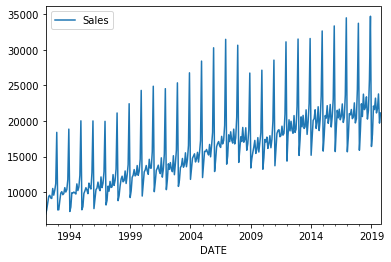

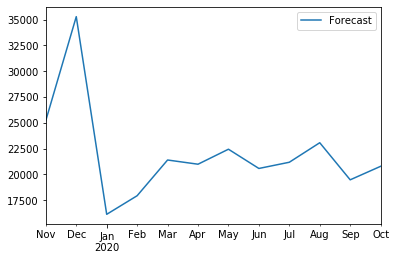

In [77]:
data.plot()
forecast_df.plot()

### Joining pandas plots
https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

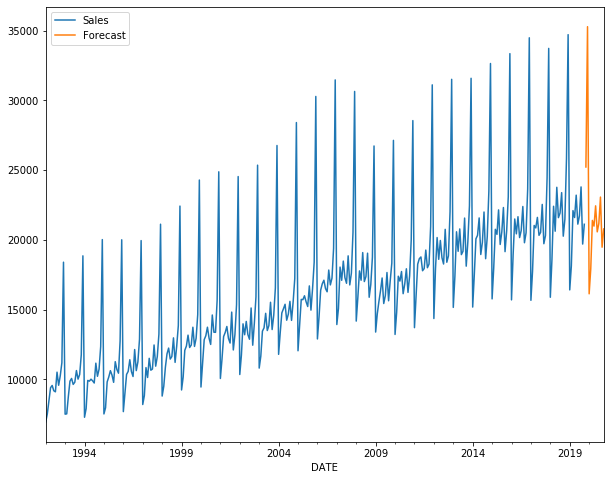

In [87]:
ax = data.plot(figsize=(10,8))
forecast_df.plot(ax=ax)

(576, 611)

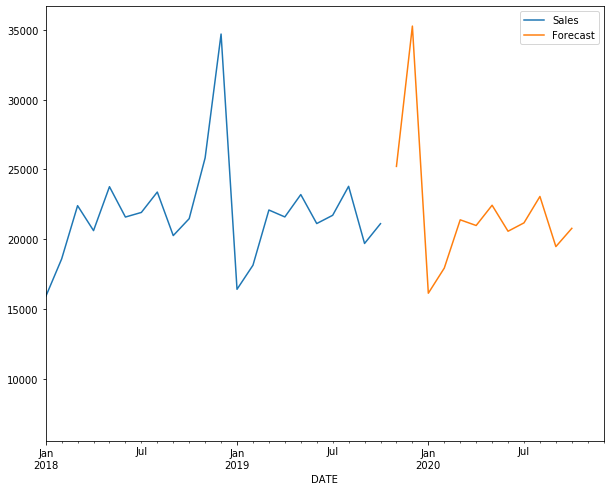

In [92]:
ax = data.plot(figsize=(10,8))
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')

## Great Job!